# Isoprenol analysis for all cycles

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv('df_target_all.csv', index_col = 0)
df = pd.read_csv('df_target_all_TEST.csv', index_col = 0)

## Analyze positional dependence of downregulation

In [3]:
dbtl3_targets = df.loc[df['cycle'] >= 3, [f'target_{i}' for i in [1,2,3,4]]].values.flatten()
dbtl3_targets = np.unique(dbtl3_targets[~pd.isna(dbtl3_targets)])
dbtl3_targets

array(['PP_0368', 'PP_0437', 'PP_0528', 'PP_0751', 'PP_0812', 'PP_0813',
       'PP_0814', 'PP_0815', 'PP_1317', 'PP_1506', 'PP_1769', 'PP_2136',
       'PP_4120', 'PP_4189', 'PP_4191', 'PP_4192'], dtype=object)

In [4]:
t_list = []
pos_list = []
dr_list = []
for t in dbtl3_targets:
    for pos in [1, 2, 3, 4]:
        df_sub = df[(df['cycle']>=3) & (df[f'target_{pos}'] == t)  & (~pd.isna(df[f'target_{pos}_norm']))]
        for idx, srs in df_sub.iterrows():
            t_list.append(t)
            pos_list.append(pos)
            dr_list.append(srs[f'target_{pos}_norm'])
downreg_df = pd.DataFrame.from_dict(
    {
        'target': t_list,
        'position': pos_list,
        'target_expression': dr_list
    }
)

target_count_dict = {t: sum(downreg_df['target'] == t) for t in downreg_df['target'].unique()}
downreg_df['target_freq'] = downreg_df['target'].apply(lambda x: f'{x} N = {target_count_dict[x]}')

In [5]:
sum(downreg_df['target'] == 'PP_4191')

75

<Axes: xlabel='target_expression'>

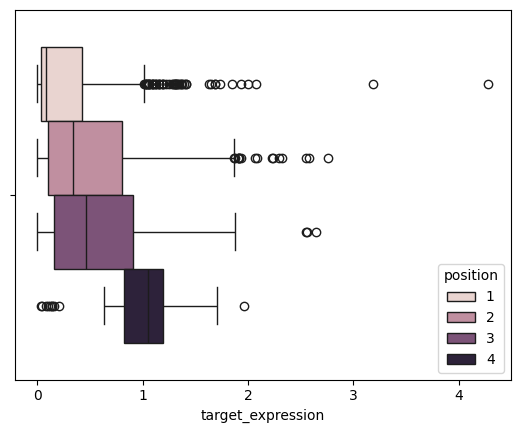

In [6]:
sns.boxplot(
    data = downreg_df,
    x = 'target_expression',
    hue = 'position'
    
)

<Axes: xlabel='target_expression', ylabel='target_freq'>

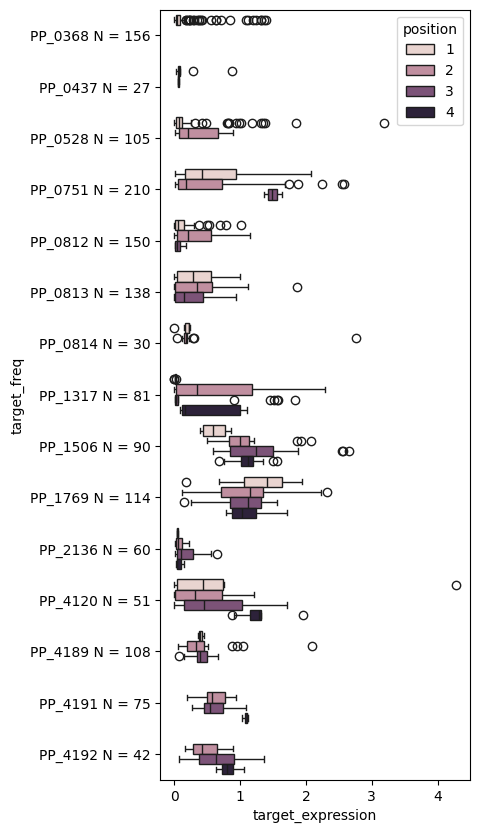

In [7]:
fig, ax = plt.subplots(figsize = (4, 10))
sns.boxplot(
    data = downreg_df,
    x = 'target_expression',
    y = 'target_freq',
    hue = 'position'
    
)

In [8]:
downreg_df[downreg_df['target'] == 'PP_0813'].value_counts('position')

position
2    66
1    51
3    21
Name: count, dtype: int64

In [9]:
downreg_df['target'].unique()

array(['PP_0368', 'PP_0437', 'PP_0528', 'PP_0751', 'PP_0812', 'PP_0813',
       'PP_0814', 'PP_1317', 'PP_1506', 'PP_1769', 'PP_2136', 'PP_4120',
       'PP_4189', 'PP_4191', 'PP_4192'], dtype=object)

In [10]:
%pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 12.9 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


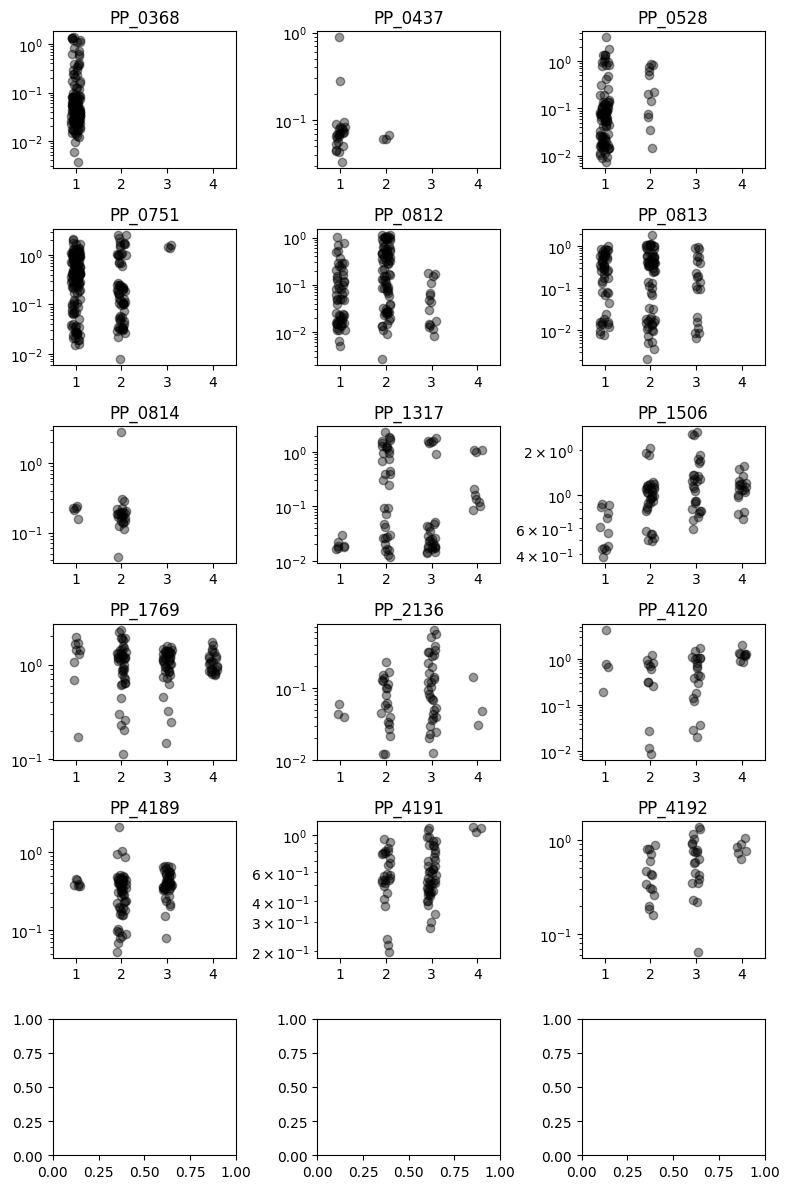

In [11]:
import statsmodels.api as sm
 # mod = sm.OLS(spector_data.endog, spector_data.exog)
fig, ax = plt.subplots(6, 3, figsize = (8,12))
for i, (a, t) in enumerate(zip(fig.get_axes(), downreg_df['target'].unique())):
    didx = (downreg_df['target'] == t) & (~pd.isna(downreg_df['target_expression']))
    a.scatter(downreg_df.loc[didx, 'position']+np.random.uniform(-0.1, 0.1, sum(didx)), downreg_df.loc[didx, 'target_expression'], c = 'k', alpha = 0.4)
    a.set_yscale('log')
    a.set_title(t)
    a.set_xlim([0.5, 4.5])
    a.set_xticks([1,2,3,4])
    X = sm.add_constant(downreg_df.loc[didx,'position'].reset_index(drop = True))
    mod = sm.OLS(downreg_df.loc[didx, 'target_expression'].reset_index(drop = True), X)

fig.tight_layout()

In [12]:
X

,const,position
0,1.0,2
1,1.0,2
2,1.0,2
3,1.0,2
4,1.0,2
5,1.0,2
6,1.0,2
7,1.0,2
8,1.0,2
9,1.0,2


In [13]:
downreg_df.loc[didx,:]

,target,position,target_expression,target_freq
1395,PP_4192,2,0.893156,PP_4192 N = 42
1396,PP_4192,2,0.802670,PP_4192 N = 42
1397,PP_4192,2,0.810049,PP_4192 N = 42
1398,PP_4192,2,0.199297,PP_4192 N = 42
1399,PP_4192,2,0.431677,PP_4192 N = 42
1400,PP_4192,2,0.425350,PP_4192 N = 42
1401,PP_4192,2,0.467970,PP_4192 N = 42
1402,PP_4192,2,0.594295,PP_4192 N = 42
1403,PP_4192,2,0.706333,PP_4192 N = 42
1404,PP_4192,2,0.299507,PP_4192 N = 42


Text(0.5, 1.0, 'Target interference vs. gRNA position')

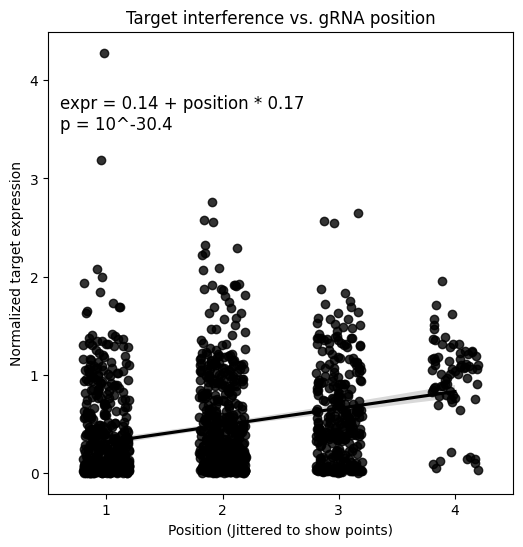

In [14]:
fig, ax = plt.subplots(figsize = (6,6))
sns.regplot(
        data = downreg_df,
        x = 'position',
        y = 'target_expression',
        x_jitter = 0.2,
        ax = ax, 
        color = 'k',
    )
ax.set_xlim([0.5, 4.5])
ax.set_xticks([1,2,3,4])
X = sm.add_constant(downreg_df.loc[:,'position'])
mod = sm.OLS(downreg_df.loc[:, 'target_expression'].reset_index(drop = True), X)
res = mod.fit()
params = res.params
ax.text(
    x = 0.6,
    y = 3.5,
    s = f'expr = {res.params.const:.2f} + position * {res.params.position:.2f}\np = 10^{np.log10(res.pvalues.position):.1f}',
    fontsize = 12
)

ax.set_ylabel('Normalized target expression')
ax.set_xlabel('Position (Jittered to show points)')
ax.set_title('Target interference vs. gRNA position')

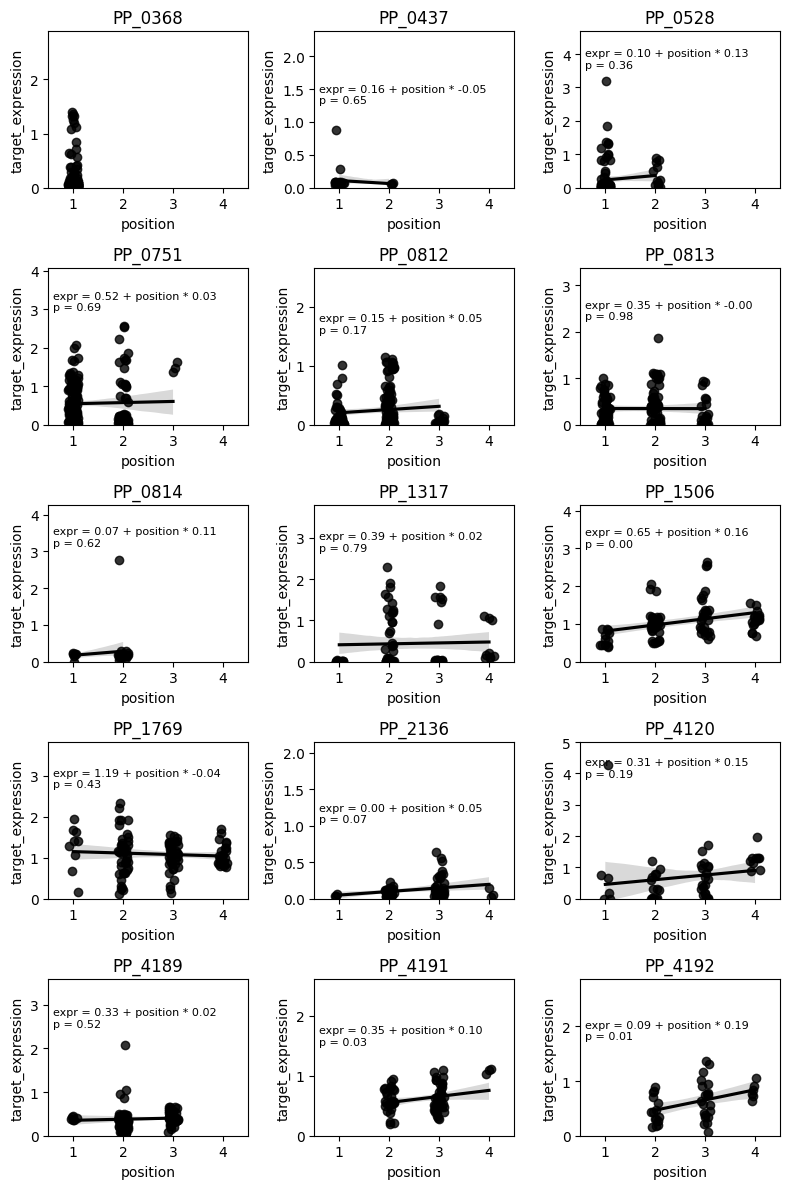

In [15]:
# mod = sm.OLS(spector_data.endog, spector_data.exog)
fig, ax = plt.subplots(5, 3, figsize = (8,12))
for i, (a, t) in enumerate(zip(fig.get_axes(), downreg_df['target'].unique())):
    didx = (downreg_df['target'] == t) & (~pd.isna(downreg_df['target_expression']))
    sns.regplot(
        data = downreg_df.loc[didx,:],
        x = 'position',
        y = 'target_expression',
        x_jitter = 0.1,
        ax = a, 
        color = 'k'
    )
    a.set_title(t)
    a.set_xlim([0.5, 4.5])
    a.set_xticks([1,2,3,4])
    max_te = np.min([downreg_df.loc[didx, 'target_expression'].max(), 3.5])
    # a.set_ylim([0, max_te + 1])
    a.set_ylim([0, max_te+1.5])
    if len(downreg_df.loc[didx,'position'].unique()) > 1:
        X = sm.add_constant(downreg_df.loc[didx,'position'].reset_index(drop = True))
        mod = sm.OLS(downreg_df.loc[didx, 'target_expression'].reset_index(drop = True), X)
        res = mod.fit()
        params = res.params
        a.text(
            x = 0.6,
            y = max_te + 0.4,
            s = f'expr = {res.params.const:.2f} + position * {res.params.position:.2f}\np = {res.pvalues.position:.2f}',
            fontsize = 8
        )

    

fig.tight_layout()

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_expression   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     7.412
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00955
Time:                        18:17:52   Log-Likelihood:                -7.8625
No. Observations:                  42   AIC:                             19.73
Df Residuals:                      40   BIC:                             23.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.196      0.483      0.632      -0.302       0.491
position       0.1864      0.068      2.723      0.010       0.048       0.325
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.604
Skew:                           0.468   Prob(JB):                        0.448
Kurtosis:                       2.798   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
res.params.const

0.09476589048687399

In [18]:
res.pvalues.position

0.00955071250920821

In [19]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_expression   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     7.412
Date:                Fri, 28 Feb 2025   Prob (F-statistic):            0.00955
Time:                        18:17:53   Log-Likelihood:                -7.8625
No. Observations:                  42   AIC:                             19.73
Df Residuals:                      40   BIC:                             23.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0948      0.196      0.483      0.632      -0.302       0.491
position       0.1864      0.068      2.723      0.010       0.048       0.325
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.604
Skew:                           0.468   Prob(JB):                        0.448
Kurtosis:                       2.798   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot filter passage at each cycle

In [20]:
cycles_to_plot = [i for i in range(7)]
filter_passage_df = pd.DataFrame().from_dict(
    {
        'cycle': cycles_to_plot,
        'name': [f'DBTL{i}' for i in cycles_to_plot],
        'N_pass': None,
        'N_total': None,
        'N_fail': None,
    }
)

for idx, srs in filter_passage_df.iterrows():
    filter_passage_df.loc[idx, 'N_pass'] = len(df.loc[(df['cycle'] == srs['cycle']) & (df['to_keep_improved']), :])/3
    filter_passage_df.loc[idx, 'N_total'] = len(df.loc[(df['cycle'] == srs['cycle']), :])/3
    filter_passage_df.loc[idx, 'N_fail'] = len(df.loc[(df['cycle'] == srs['cycle']) & (~df['to_keep_improved']), :])/3
filter_passage_df['% passing'] = filter_passage_df['N_pass']/filter_passage_df['N_total'] * 100

Text(0.5, 0, '% of strains passing filters')

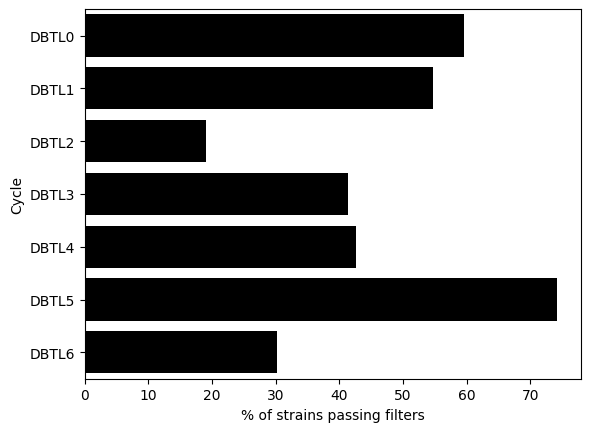

In [21]:
fig, ax = plt.subplots()
sns.barplot(data = filter_passage_df, x = '% passing', y = 'name', color = 'k', ax = ax)
ax.set_ylabel('Cycle')
ax.set_xlabel('% of strains passing filters')

## Plot titer vs fitler passage

In [22]:
df

,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,above_dcas9_thresh,target_1_belowthresh,target_2_belowthresh,target_3_belowthresh,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved
0,Control-R1,0,True,Control,0,177.33700,23396190.6,1.007405,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
1,Control-R10,0,True,Control,0,176.13507,28115139.4,1.275427,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
2,Control-R11,0,True,Control,0,192.63713,24151481.4,1.095618,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
3,Control-R12,0,True,Control,0,202.70480,26008612.7,1.179865,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
4,Control-R13,0,True,Control,0,123.84653,18057997.4,0.819190,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,PP_0813_PP_0815_PP_1506-R2,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,669708.8,0.044699,PP_0813,PP_0815,...,False,True,True,False,False,False,False,False,0.0,False
1502,PP_0813_PP_0815_PP_1506-R3,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,476134.4,0.031779,PP_0813,PP_0815,...,False,True,True,False,False,False,False,False,0.0,False
1503,PP_1506_PP_4120-R1,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,False,True,False,False,False,False,False,0.0,False
1504,PP_1506_PP_4120-R2,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,True,True,False,False,True,False,False,0.0,False


<Axes: xlabel='isoprenol', ylabel='cycle'>

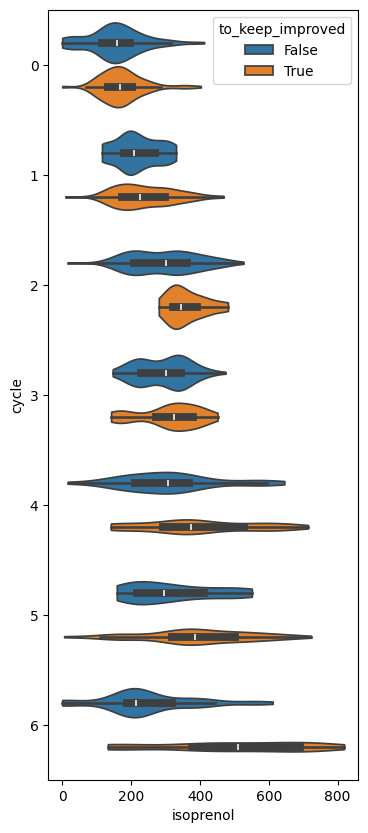

In [23]:
fig, ax = plt.subplots(figsize = (4, 10))
sns.violinplot(
    data = df,
    x = 'isoprenol',
    y = 'cycle',
    orient = 'h',
    hue = 'to_keep_improved', 
    cut = 0
)

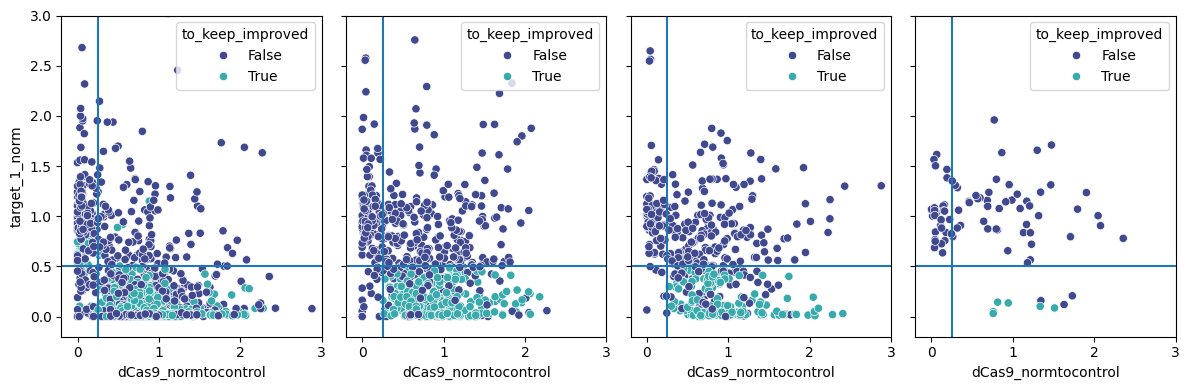

In [24]:
fig, ax = plt.subplots(nrows =1, ncols = 4, figsize = (12,4), sharex=True, sharey=True)
sns.scatterplot(df, x = 'dCas9_normtocontrol', y = 'target_1_norm', hue = 'to_keep_improved', ax = ax[0], palette = 'mako')
sns.scatterplot(df, x = 'dCas9_normtocontrol', y = 'target_2_norm', hue = 'to_keep_improved', ax = ax[1], palette = 'mako')
sns.scatterplot(df, x = 'dCas9_normtocontrol', y = 'target_3_norm', hue = 'to_keep_improved', ax = ax[2], palette = 'mako')
sns.scatterplot(df, x = 'dCas9_normtocontrol', y = 'target_4_norm', hue = 'to_keep_improved', ax = ax[3], palette = 'mako')

for a in ax:
    a.axhline(0.5)
    a.axvline(0.25)
    a.set_xlim([-0.2, 3])
    a.set_ylim([-0.2, 3])
    

    
fig.tight_layout()

## Plot ART R2 values

In [25]:
art_cycles = [1,2,3,4,5]
art_folders = [f'dbtl{i}_art_outputs/' for i in art_cycles]
art_folders[2] = 'dbtl3ONLY_art_outputs/'
df_column = '$R^2$'
df_row = 'Ensemble Model'
art_perf_df = pd.DataFrame.from_dict(
    {
        'folder': art_folders,
        'cycle': art_cycles,
        'name': [f'DBTL{i}' for i in art_cycles],
    }
)
art_perf_df[['r2', 'cv_r2']] = None
for idx, srs in art_perf_df.iterrows():
    if srs['cycle']==3:
        r2_df = pd.read_csv(f'{srs['folder']}metric0.csv', index_col = 0)
        r2_cv_df = pd.read_csv(f'{srs['folder']}cv_metric0.csv', index_col = 0)
    else:
        r2_df = pd.read_csv(f'{srs['folder']}metric_isoprenol.csv', index_col = 0)
        r2_cv_df = pd.read_csv(f'{srs['folder']}cv_metric_isoprenol.csv', index_col = 0)

    art_perf_df.loc[idx, 'r2'] = r2_df.loc[df_row, df_column]
    art_perf_df.loc[idx, 'cv_r2'] = r2_cv_df.loc[df_row, df_column]

In [26]:
art_perf_df

,folder,cycle,name,r2,cv_r2
0,dbtl1_art_outputs/,1,DBTL1,0.904311,0.043039
1,dbtl2_art_outputs/,2,DBTL2,0.908956,0.552922
2,dbtl3ONLY_art_outputs/,3,DBTL3,0.956492,0.408193
3,dbtl4_art_outputs/,4,DBTL4,0.886727,0.584166
4,dbtl5_art_outputs/,5,DBTL5,0.937853,0.479059


In [27]:
art_perf_df_melt = pd.melt(art_perf_df, id_vars = 'name', value_vars = ['r2', 'cv_r2'])
art_perf_df_melt

,name,variable,value
0,DBTL1,r2,0.904311
1,DBTL2,r2,0.908956
2,DBTL3,r2,0.956492
3,DBTL4,r2,0.886727
4,DBTL5,r2,0.937853
5,DBTL1,cv_r2,0.043039
6,DBTL2,cv_r2,0.552922
7,DBTL3,cv_r2,0.408193
8,DBTL4,cv_r2,0.584166
9,DBTL5,cv_r2,0.479059


<Axes: xlabel='name', ylabel='value'>

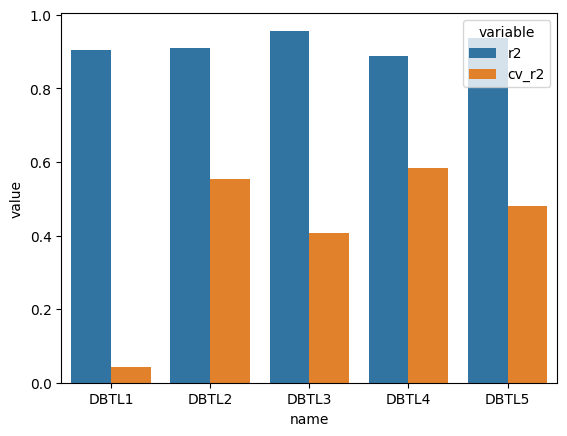

In [28]:
sns.barplot(data = art_perf_df_melt, 
            x = 'name',
            y = 'value',
            hue = 'variable'
           )

## Look at isoprenol titer as a function of presence or absence of gRNA

In [31]:
all_targets = df.loc[df['cycle']>=3, [f'target_{i}' for i in [1,2,3,4]]].values.flatten().tolist()
all_targets = list(set([t for t in all_targets if type(t) == str]))
all_targets.sort()
print(f'all targets: {all_targets}')
print(f'len(all_targets): {len(all_targets)}')

all targets: ['PP_0368', 'PP_0437', 'PP_0528', 'PP_0751', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_1317', 'PP_1506', 'PP_1769', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_4192']
len(all_targets): 16


In [32]:
df

,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,above_dcas9_thresh,target_1_belowthresh,target_2_belowthresh,target_3_belowthresh,target_4_belowthresh,all_targets_belowthresh,all_reps_belowthresh,all_reps_above_dcas9_thresh,to_keep,to_keep_improved
0,Control-R1,0,True,Control,0,177.33700,23396190.6,1.007405,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
1,Control-R10,0,True,Control,0,176.13507,28115139.4,1.275427,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
2,Control-R11,0,True,Control,0,192.63713,24151481.4,1.095618,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
3,Control-R12,0,True,Control,0,202.70480,26008612.7,1.179865,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
4,Control-R13,0,True,Control,0,123.84653,18057997.4,0.819190,NaN,NaN,...,True,False,False,False,False,True,True,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,PP_0813_PP_0815_PP_1506-R2,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,669708.8,0.044699,PP_0813,PP_0815,...,False,True,True,False,False,False,False,False,0.0,False
1502,PP_0813_PP_0815_PP_1506-R3,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,476134.4,0.031779,PP_0813,PP_0815,...,False,True,True,False,False,False,False,False,0.0,False
1503,PP_1506_PP_4120-R1,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,False,True,False,False,False,False,False,0.0,False
1504,PP_1506_PP_4120-R2,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,True,True,False,False,True,False,False,0.0,False


In [33]:
for t in all_targets:
    column_name = f'has_target_{t}'
    df[column_name] = df['Line Name'].apply(lambda x: t in x)

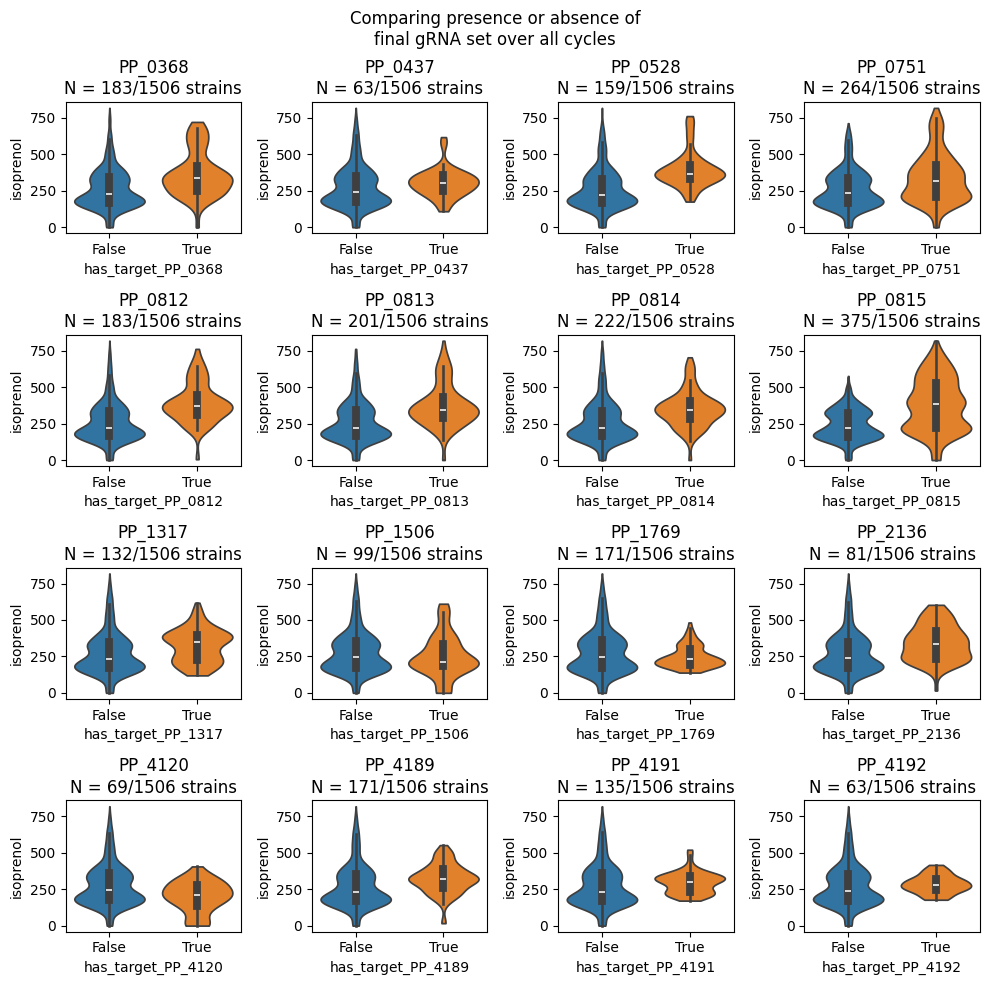

In [34]:
fig, ax = plt.subplots(4,4,figsize = (10,10))
for i, (a, t) in enumerate(zip(fig.get_axes(), all_targets)):
    column_name = f'has_target_{t}'
    bp = sns.violinplot(
        data = df,
        y = 'isoprenol',
        hue = column_name,
        x = column_name,
        ax = a,
        cut = 0
    )
    title_string = f'{t}\nN = {df[column_name].sum()}/{len(df[column_name])} strains'
    a.set_title(title_string)
    a.get_legend().remove()
fig.suptitle('Comparing presence or absence of\nfinal gRNA set over all cycles')
fig.tight_layout()


## Plot strains (mean of all lines) with titer > 4x control

In [38]:
df['line_name_rep_cycle'] = df.apply(lambda x: f"{x['line_name_norep']}_c{x['cycle']}",axis = 1)

In [39]:
df

,Line Name,cycle,is_control,line_name_norep,number_of_grna,isoprenol,dCas9,dCas9_normtocontrol,target_1,target_2,...,has_target_PP_0815,has_target_PP_1317,has_target_PP_1506,has_target_PP_1769,has_target_PP_2136,has_target_PP_4120,has_target_PP_4189,has_target_PP_4191,has_target_PP_4192,line_name_rep_cycle
0,Control-R1,0,True,Control,0,177.33700,23396190.6,1.007405,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Control_c0
1,Control-R10,0,True,Control,0,176.13507,28115139.4,1.275427,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Control_c0
2,Control-R11,0,True,Control,0,192.63713,24151481.4,1.095618,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Control_c0
3,Control-R12,0,True,Control,0,202.70480,26008612.7,1.179865,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Control_c0
4,Control-R13,0,True,Control,0,123.84653,18057997.4,0.819190,NaN,NaN,...,False,False,False,False,False,False,False,False,False,Control_c0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,PP_0813_PP_0815_PP_1506-R2,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,669708.8,0.044699,PP_0813,PP_0815,...,True,False,True,False,False,False,False,False,False,PP_0813_PP_0815_PP_1506_c6
1502,PP_0813_PP_0815_PP_1506-R3,6,False,PP_0813_PP_0815_PP_1506,3,0.00000,476134.4,0.031779,PP_0813,PP_0815,...,True,False,True,False,False,False,False,False,False,PP_0813_PP_0815_PP_1506_c6
1503,PP_1506_PP_4120-R1,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,False,True,False,False,True,False,False,False,PP_1506_PP_4120_c6
1504,PP_1506_PP_4120-R2,6,False,PP_1506_PP_4120,2,0.00000,0.0,0.000000,PP_1506,PP_4120,...,False,False,True,False,False,True,False,False,False,PP_1506_PP_4120_c6


In [64]:
df_mean = df.loc[:, ['line_name_rep_cycle', 'isoprenol']].groupby('line_name_rep_cycle').agg(['mean', 'std'])
df_mean.columns = df_mean.columns.droplevel()
df_mean = df_mean.reset_index()
df_mean['is_control'] = ['ontrol' in x for x in df_mean['line_name_rep_cycle']]
control_mean_of_means = df_mean.loc[df_mean['is_control'], 'mean'].mean()
df_high_performers = df_mean.loc[df_mean['mean']> 4*control_mean_of_means, :]
df_high_performers = df_high_performers.sort_values('mean', ascending = False).reset_index(drop = True)
[print(f'{x} -- {y:.2f} mg/L') for x, y in df_high_performers[['line_name_rep_cycle', 'mean']].values]

PP_0751_PP_0813_PP_0815_c6 -- 771.16 mg/L
PP_0528_PP_0751_PP_0815_c6 -- 743.63 mg/L
PP_0528_PP_0751_PP_0812_PP_0815_c6 -- 739.11 mg/L
PP_0528_PP_0751_PP_0813_PP_0815_c6 -- 719.63 mg/L
PP_0368_PP_0751_PP_0815_c5 -- 681.45 mg/L
PP_0368_PP_0751_PP_0813_PP_0815_c6 -- 680.83 mg/L
PP_0368_PP_0812_PP_0815_c4 -- 679.83 mg/L
PP_0368_PP_0814_PP_0815_c5 -- 672.02 mg/L
PP_0368_PP_0751_PP_0812_PP_0815_c5 -- 650.79 mg/L
PP_0368_PP_0751_PP_0814_PP_0815_c6 -- 648.48 mg/L
PP_0812_PP_0813_PP_0815_c4 -- 644.52 mg/L
PP_0528_PP_0813_PP_0815_c6 -- 642.67 mg/L


[None, None, None, None, None, None, None, None, None, None, None, None]

In [65]:
[print(t) for t in all_targets]

PP_0368
PP_0437
PP_0528
PP_0751
PP_0812
PP_0813
PP_0814
PP_0815
PP_1317
PP_1506
PP_1769
PP_2136
PP_4120
PP_4189
PP_4191
PP_4192


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [84]:
target_count_df

,Line Name,cycle,variable,value
12,PP_0368_PP_0528_PP_4191-R1,3,target_1,PP_0368
13,PP_0368_PP_0528_PP_4191-R2,3,target_1,PP_0368
14,PP_0368_PP_0528_PP_4191-R3,3,target_1,PP_0368
15,PP_0368_PP_0812-R1,3,target_1,PP_0368
16,PP_0368_PP_0812-R2,3,target_1,PP_0368
...,...,...,...,...
2910,PP_0751_PP_0813_PP_0815_PP_1769-R2,6,target_4,PP_1769
2911,PP_0368_PP_0751_PP_0815_PP_1506-R1,6,target_4,PP_1506
2919,PP_0751_PP_0814_PP_0815_PP_1506-R1,6,target_4,PP_1506
2920,PP_0751_PP_0814_PP_0815_PP_1506-R2,6,target_4,PP_1506


<Axes: xlabel='count', ylabel='value'>

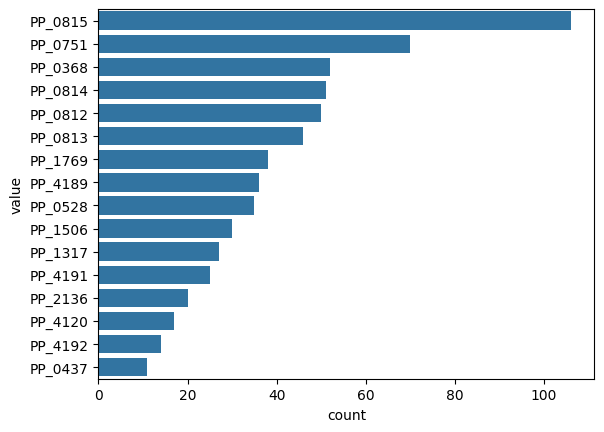

In [85]:
target_count_df = df.loc[df['cycle']>=3, ['Line Name', 'cycle', 'target_1', 'target_2', 'target_3', 'target_4']].melt(id_vars = ['Line Name', 'cycle']).dropna(subset = 'value', axis = 0)
target_count_df = target_count_df.loc[target_count_df['Line Name'].str.contains('-R1'), :]
sns.countplot(target_count_df, y = 'value', order = target_count_df.value_counts('value').index)
# target_count_df.value_counts('value')

In [91]:
print('Target\tCount')
print(target_count_df.value_counts('value'))
# target_count_df.value_counts('value')

Target	Count
value
PP_0815    106
PP_0751     70
PP_0368     52
PP_0814     51
PP_0812     50
PP_0813     46
PP_1769     38
PP_4189     36
PP_0528     35
PP_1506     30
PP_1317     27
PP_4191     25
PP_2136     20
PP_4120     17
PP_4192     14
PP_0437     11
Name: count, dtype: int64
